## Assignment 4 
### Name: Sriram Balaguru
### M#: M12510438

In [1]:
#importing modules needed
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_mldata
from sklearn.utils import shuffle

# make image appear inline
%matplotlib inline


In [2]:
#load data 
mnist = fetch_mldata("MNIST Original")
mytargets = list(range(0,10))
#mytargets = [3,8]
XX_train, yy_train = mnist.data / 255., mnist.target
X_train=[]
y_train=[]
for i, label in enumerate(yy_train):
  if label in mytargets:
    X_train.append(XX_train[i])
    y_train.append(yy_train[i])
num_samples_to_plot = 5000
X_train, y_train = shuffle(X_train, y_train)
X_train, y_train = X_train[:num_samples_to_plot], y_train[:num_samples_to_plot]  # lets subsample a bit for a first impression

print "Number of occurances of digits"
for digit in mytargets:
  instances=[i for i in y_train if i==digit]
  print "Digit",digit," - ",len(instances)



Number of occurances of digits
Digit 0  -  495
Digit 1  -  535
Digit 2  -  512
Digit 3  -  534
Digit 4  -  479
Digit 5  -  470
Digit 6  -  501
Digit 7  -  501
Digit 8  -  469
Digit 9  -  504


### t-SNE is a tool for data visualization. It reduces the dimensionality of data to 2 or 3 dimensions so that it can be plotted easily. Local similarities are preserved by this embedding.

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.304s...
[t-SNE] Computed neighbors for 5000 samples in 39.944s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.332486
[t-SNE] Computed conditional probabilities in 0.262s
[t-SNE] Iteration 50: error = 85.4872513, gradient norm = 0.0006950 (50 iterations in 11.119s)
[t-SNE] Iteration 100: error = 81.7458267, gradient norm = 0.0024907 (50 iterations in 9.562s)
[t-SNE] Iteration 150: error = 81.1336212, gradient norm = 0.0011480 (50 iterations in 9.398s)
[t-SNE] Iteration 200: error = 81.0711594, gradient norm = 0.0012540 (50 iterations in 9.334s)
[t-SNE] Iteration 250: error = 81.0248337, gradient norm = 0.0002

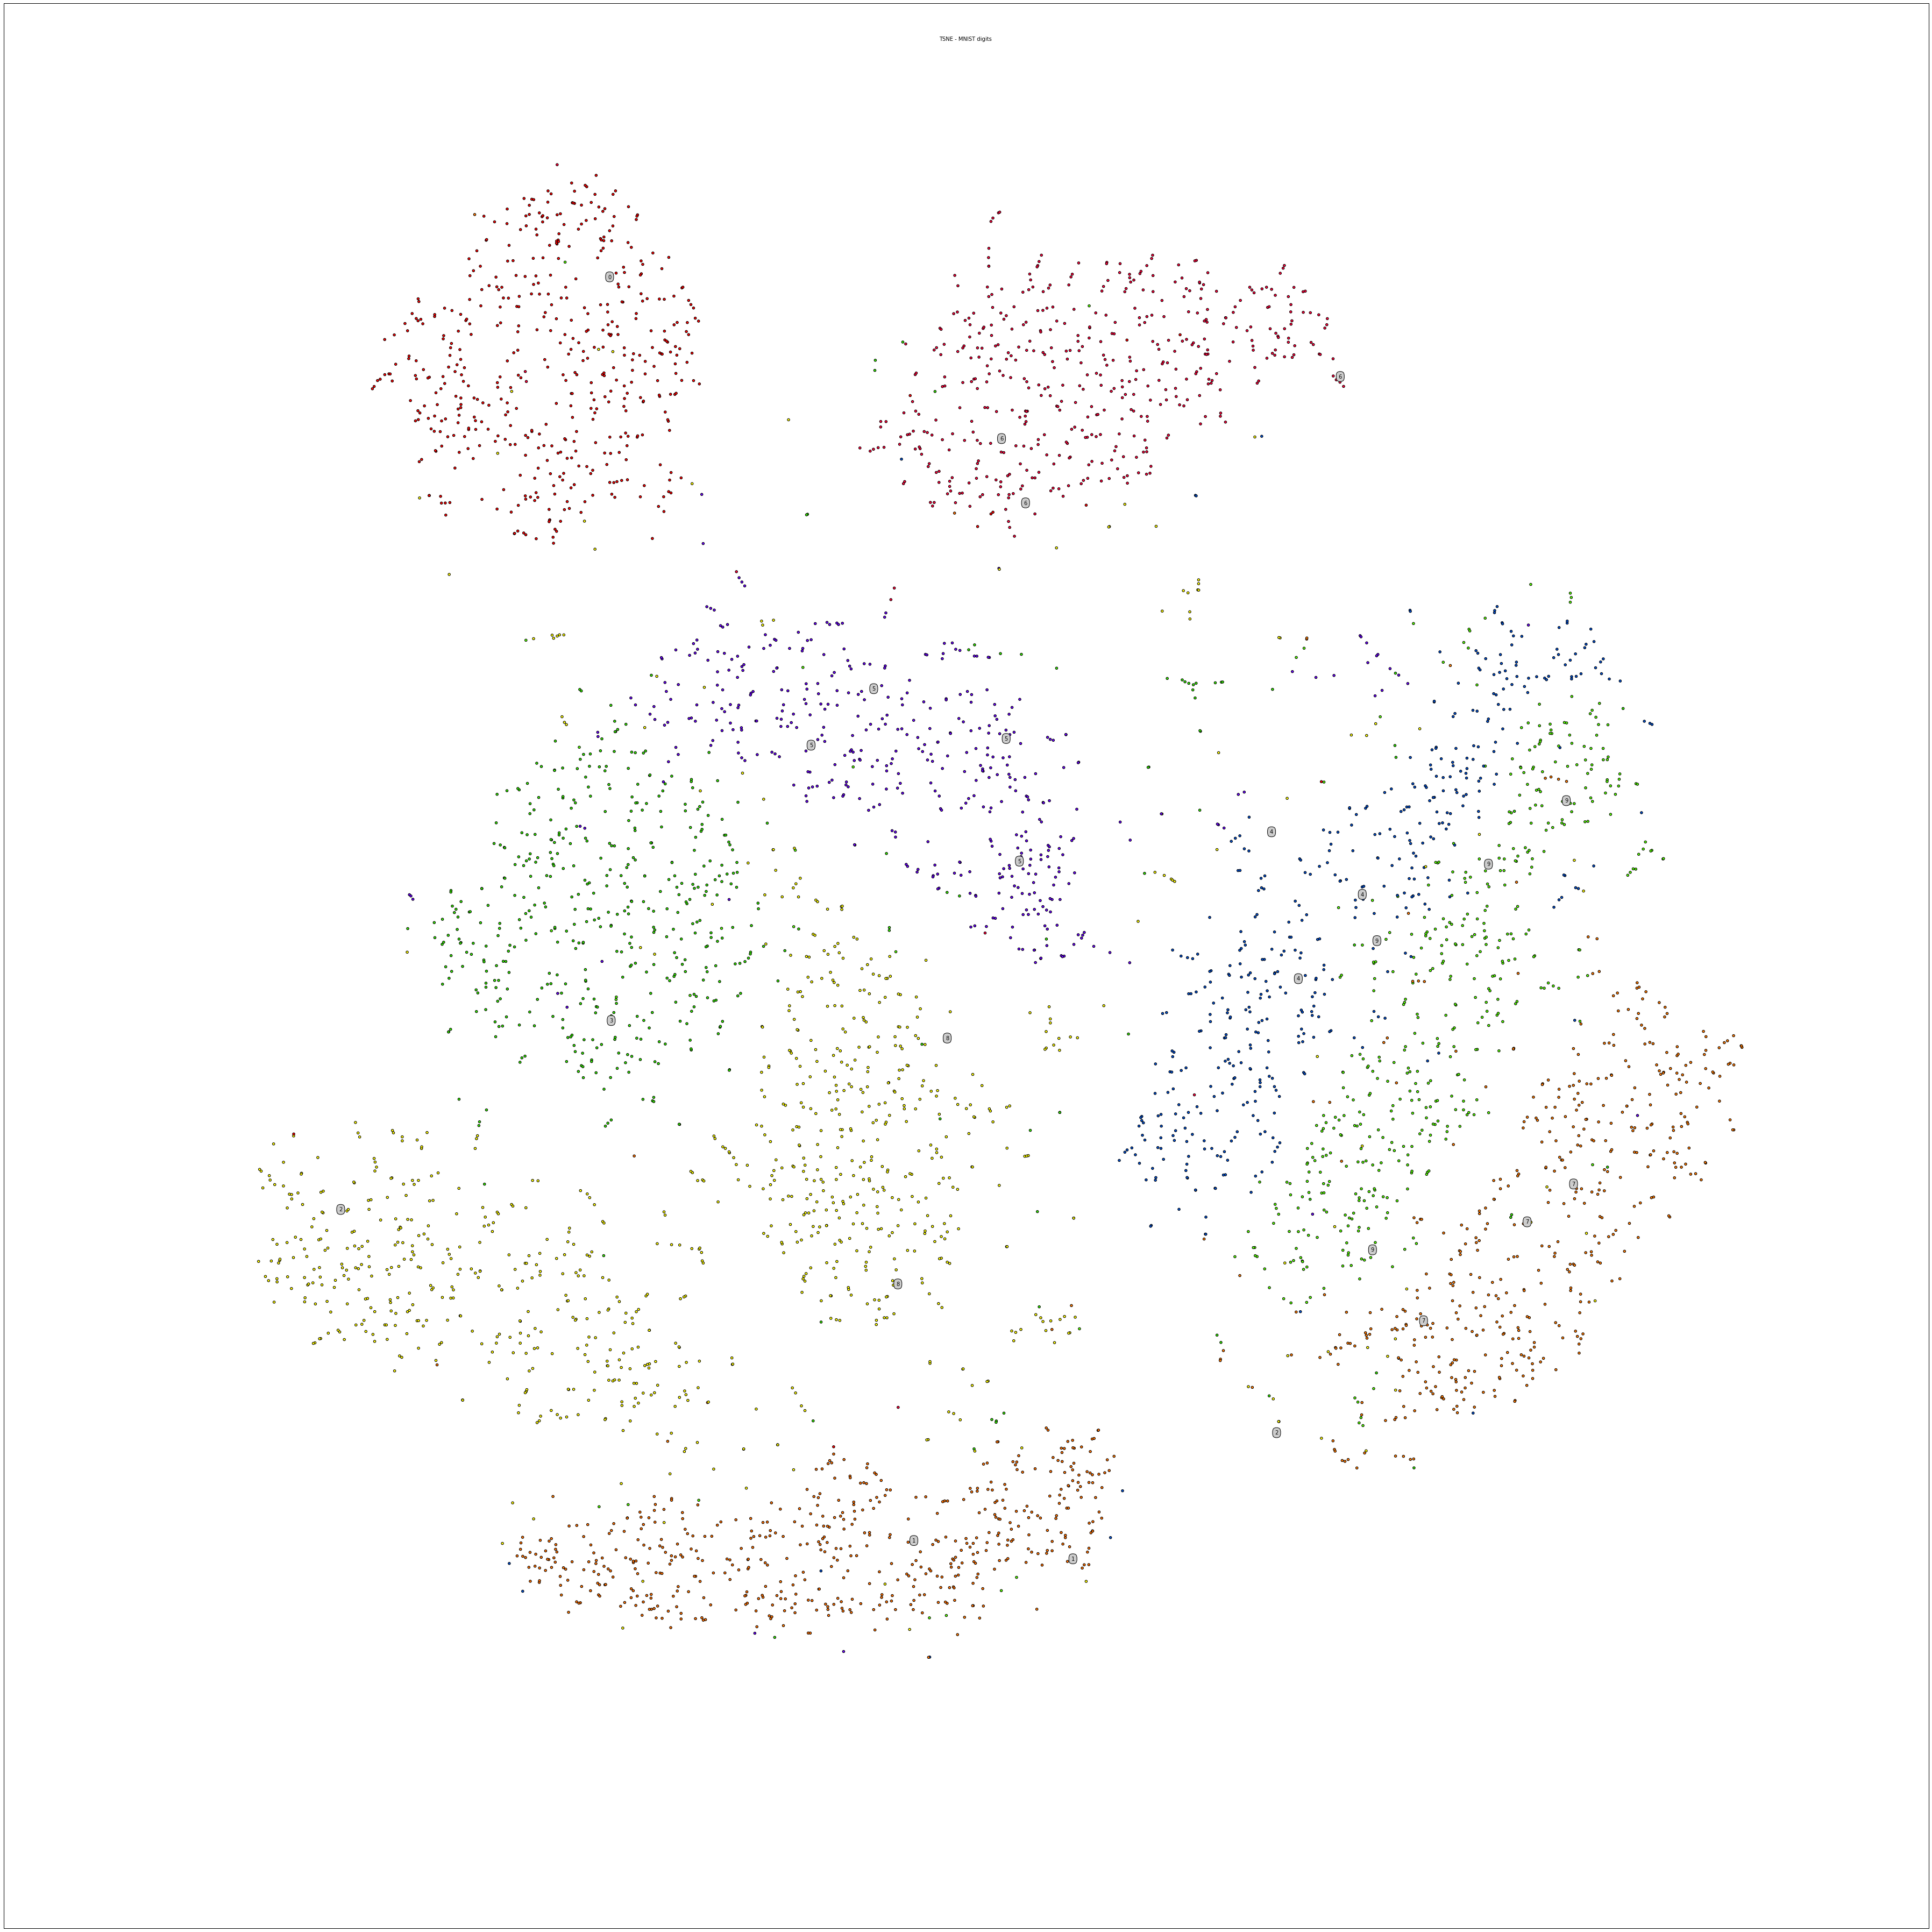

In [3]:
# Create TNSE 
transformer = TSNE(n_components = 2, perplexity=40, verbose=2)
fig, plot = plt.subplots()
fig.set_size_inches(50, 50)
plt.prism()

# plot the final fitted tNSE for MNIST digits data 
X_transformed = transformer.fit_transform(X_train)
plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_train)
plot.set_xticks(())
plot.set_yticks(())
count=0;
plt.tight_layout()
plt.suptitle("TSNE - MNIST digits ")
for label , x, y in zip(y_train, X_transformed[:, 0], X_transformed[:, 1]):
#Lets annotate every 1 out of 200 samples, otherwise graph will be cluttered with anotations
  if count % 200 == 0:
    plt.annotate(str(int(label)),xy=(x,y), color='black', weight='normal',size=10,bbox=dict(boxstyle="round4,pad=.5", fc="0.8"))
  count = count + 1
plt.savefig("mnist_tnse_1.png")
plt.show()

In [4]:
#importing modules needed
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.datasets import fetch_mldata
from sklearn.utils import shuffle
%matplotlib inline


In [5]:
#load data
mnist = fetch_mldata("MNIST Original")
mytargets = list(range(0,10))

XX_train, yy_train = mnist.data / 255., mnist.target
X_train=[]
y_train=[]
for i, label in enumerate(yy_train):
  if label in mytargets:
    X_train.append(XX_train[i])
    y_train.append(yy_train[i])
num_samples_to_plot = 5000
X_train, y_train = shuffle(X_train, y_train)
X_train, y_train = X_train[:num_samples_to_plot], y_train[:num_samples_to_plot]  # lets subsample a bit for a first impression


In [6]:
print "Number of occurances of digits"
for digit in mytargets:
  instances=[i for i in y_train if i==digit]
  print "Digit",digit," - ",len(instances)


Number of occurances of digits
Digit 0  -  509
Digit 1  -  536
Digit 2  -  493
Digit 3  -  485
Digit 4  -  495
Digit 5  -  447
Digit 6  -  486
Digit 7  -  563
Digit 8  -  483
Digit 9  -  503


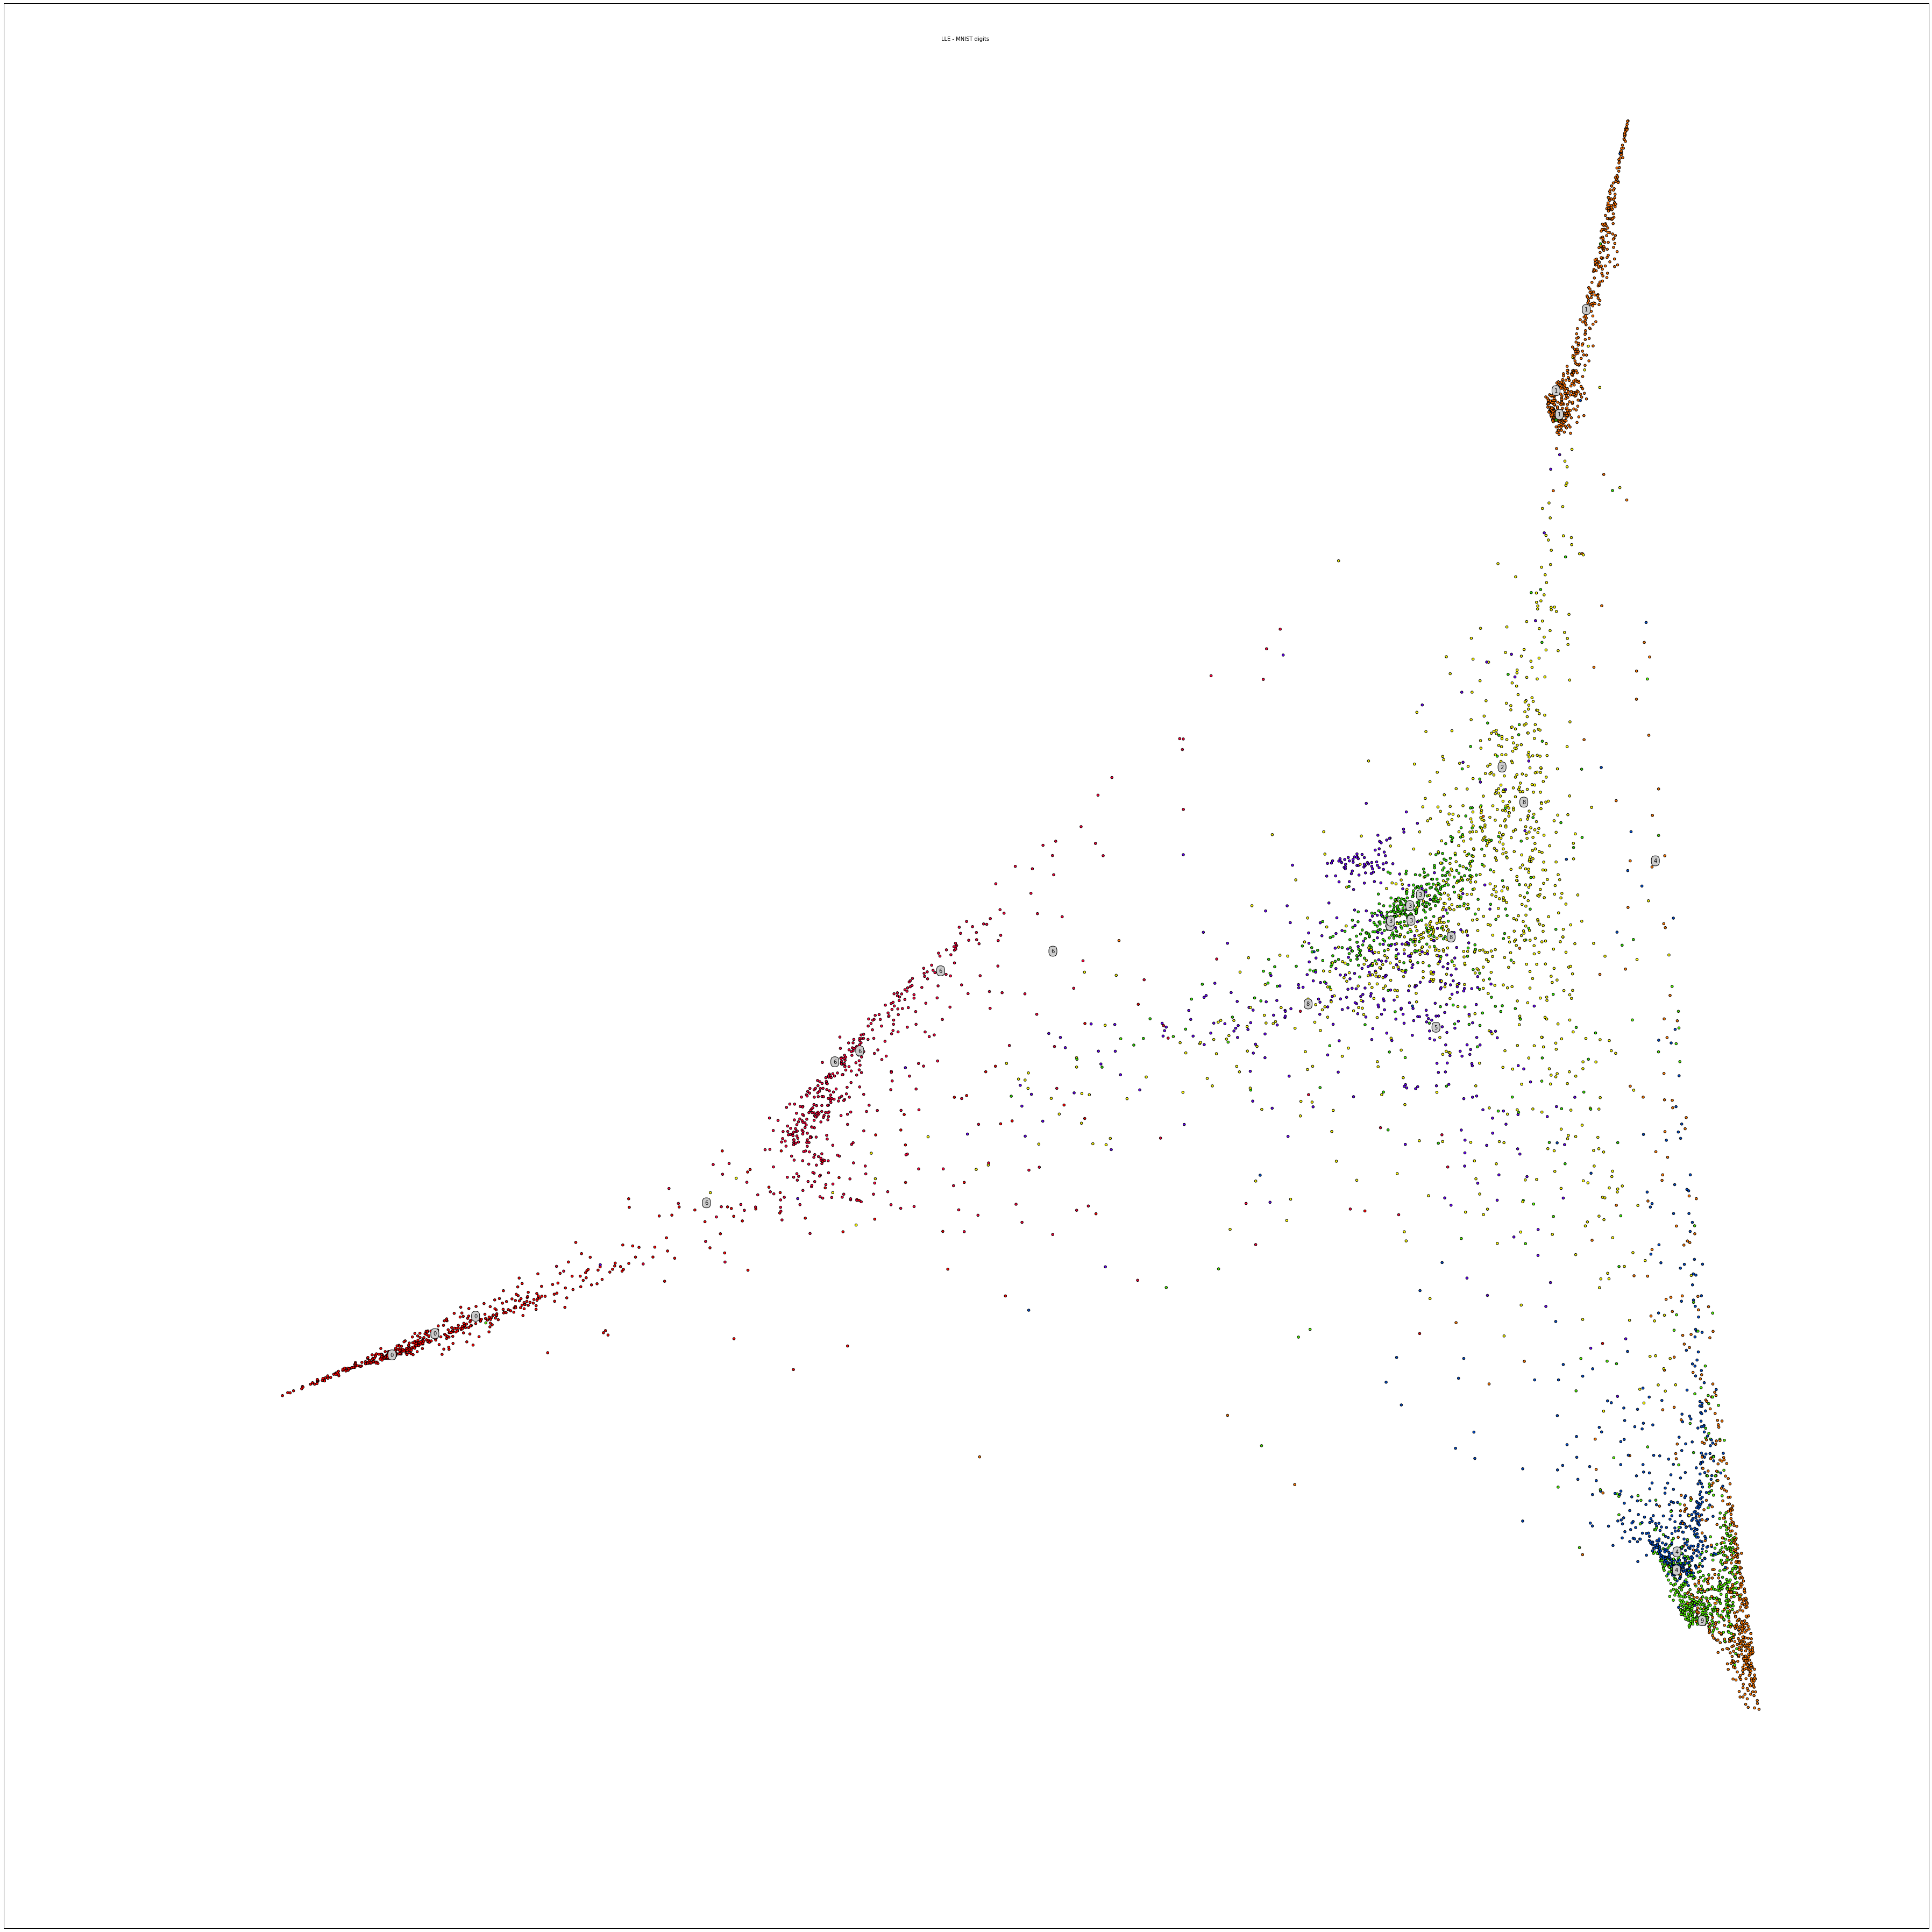

In [7]:
#Locally Linear Embedding
transformer = LocallyLinearEmbedding(n_neighbors = 10, n_components = 2,
                                     eigen_solver='auto', method='standard')
fig, plot = plt.subplots()
fig.set_size_inches(50, 50)
plt.prism()

X_transformed = transformer.fit_transform(X_train)
plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_train)
plot.set_xticks(())
plot.set_yticks(())
#plot the LLE for MNIST digits
count=0;
plt.tight_layout()
plt.suptitle("LLE - MNIST digits ")
for label , x, y in zip(y_train, X_transformed[:, 0], X_transformed[:, 1]):
#Lets annotate every 1 out of 200 samples, otherwise graph will be cluttered with anotations
  if count % 200 == 0:
    plt.annotate(str(int(label)),xy=(x,y), color='black', weight='normal',size=10,bbox=dict(boxstyle="round4,pad=.5", fc="0.8"))
  count = count + 1
plt.savefig("mnist_lle_1.png")
plt.show()